In [1]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import math
import numpy as np
import scipy 
import cmath
from numba import objmode
from numpy.linalg import slogdet
from bempp.api.operators.far_field import helmholtz as helmholtz_farfield
import matplotlib.pyplot as plt

In [182]:
#bempp.api.GLOBAL_PARAMETERS.quadrature.regular = 12

In [2]:
h = 0.

In [3]:
point1 = 0.5

sphere1 = bempp.api.shapes.sphere(h=h, origin=((point1/2) + 1, 0, 0))
sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((point1/2) + 1), 0, 0))

space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
wavenumber = 0.8*1j

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)

mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat22.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

mat = np.block([[mat11,mat12],[mat21,mat22]])  
mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])
combined = np.linalg.inv(mat2).dot(mat)

print(np.log(np.linalg.det(combined)))

-0.12161953198705745


In [184]:
0.120394
0.338863

-0.12142546306827702

In [ ]:
#compute the eigenvalue condition number

cond_num = []
for i in range(len(evals)):
    cond_num.append(np.linalg.norm(evec_right[:,i])*np.linalg.norm(evec_left[:,i])/np.dot(evec_right[:,i], evec_left[:,i]))
    print(i, evals[i], cond_num[i])

In [142]:
test_num = 0
for i in range(88):
    test_num += np.log(evals[i])
print(test_num)

(-0.1214255284789369+0j)


In [141]:
evals[87] - 1

(-0.00010058618477015724+0j)

In [147]:
test_value = 0
for i in range(len(evals)):
    if np.linalg.norm(cond_num[i]) > 3: 
        test_value += np.log(evals[i])
print(test_value)

(-3.414046823026647e-12+0j)


In [120]:
a = np.log(np.linalg.det(combined))
print(a)

-0.12142556305602227


In [143]:
a - test_num

(-3.4577085375464556e-08+0j)

In [108]:
cond_num[17]

(1.0771178628343077+0j)

In [51]:
h_02_0 = [0.3330486059831188,  0.1053424453117905, 0.04433803454547886]
h_015_0 = [0.3363415241066274,  0.10593798498048394, 0.044546747534024655]
h_01_0 = [0.3383457153776368, 0.10628976725700122, 0.0446705547257792]
h_005_0 = [0.33979753360247833, 0.10653781175251052, 0.04475800284229498]
h_003_0 = [0.34010717569991256, 0.10659106285876954, 0.044776710471759074]

h_02_08 = [0.11725914620404754,  0.006393200478150703, 0.0002189268309362079]
h_015_08 = [0.11927966630605061,  0.006474927520039633, 0.00022144978618337028]
h_01_08 = [0.1205179135982149, 0.006522879669078689, 0.00022291425013803033]
h_005_08 = [0.12142556305602223, 0.0065570465774269825, 0.0002239734440621791]
h_003_08 = [0.12161953198705748 ,0.006564429242175576, 0.00022420074104158395]

Alex_0 = [0.338863, 0.106619, 0.0447867]
Alex_08 = [0.120394, 0.00656816, 0.000224324]

In [2]:
xdata = [0.03, 0.05, 0.1, 0.15, 0.2]
ydata = [0.12161953198705748, 0.12142556305602223, 0.1205179135982149, 0.11927966630605061, 0.11725914620404754]

In [45]:
def func(x, a, b,c):
    return  a*x**2 + b*x + c

In [46]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xdata, ydata, maxfev=5000)

In [47]:
popt

array([-0.10810064, -0.00055246,  0.12171989])

In [48]:
extrapolation1 = func(0, popt[0], popt[1], popt[2])
print(extrapolation1)

0.12171989266452836


In [49]:
ydata[0]

0.12161953198705748

In [14]:
func(0.03, popt[0], popt[1], popt[2])

0.12192947615978511

In [20]:
np.log(ydata[0] - ydata[1])/np.log(abs(0.03 - 0.05))

2.1850108113291986

In [23]:
np.log(ydata[1] - ydata[2])/np.log(abs(0.05 - 0.1))

2.3382103852948064

In [24]:
np.log(ydata[2] - ydata[3])/np.log(abs(0.1 - 0.15))

2.234531580948498

In [26]:
np.log(ydata[3] - ydata[4])/np.log(abs(0.15 - 0.2))

2.0710797087052777

In [38]:
ydata[0] + 0.03**2

0.12251953198705748

In [31]:
ydata[0] + 0.0009

0.12251953198705748

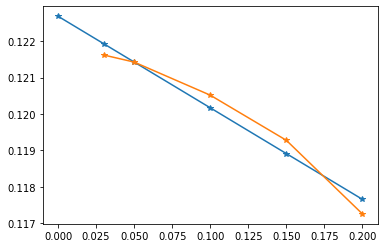

In [19]:
plt.plot([0, 0.03, 0.05, 0.1, 0.15, 0.2], [func(0, popt[0], popt[1], popt[2]), func(0.03, popt[0], popt[1], popt[2]), func(0.05, popt[0], popt[1], popt[2]),
                    func(0.1, popt[0], popt[1], popt[2]), func(0.15, popt[0], popt[1], popt[2]), func(0.2, popt[0], popt[1], popt[2])], '*-')
plt.plot(xdata, ydata, '*-')

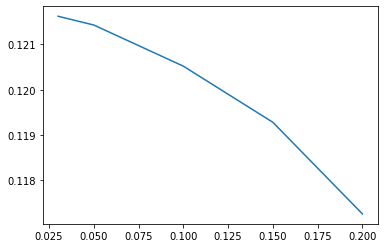

In [18]:
plt.plot(xdata, ydata)

In [25]:
popt

array([ 1.84675169e+01,  1.36039428e-03, -1.83448338e+01])

In [ ]:
0.120394
0.338863

In [4]:
point2 = 1.5

sphere1 = bempp.api.shapes.sphere(h=h, origin=((point2/2) + 1, 0, 0))
sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((point2/2) + 1), 0, 0))

space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
wavenumber = 0.8*1j

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)

mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
combined = np.linalg.inv(mat2).dot(mat)

sign, logdet = slogdet(combined)
evals2, evec2 = np.linalg.eig(combined)

print(np.linalg.cond(combined))

1.1760573897026962


In [5]:
point3 = 3.0

sphere1 = bempp.api.shapes.sphere(h=h, origin=((point3/2) + 1, 0, 0))
sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((point3/2) + 1), 0, 0))

space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
wavenumber = 0.8*1j

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)

mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
combined = np.linalg.inv(mat2).dot(mat)

sign, logdet = slogdet(combined)
evals3, evec3 = np.linalg.eig(combined)

print(np.linalg.cond(combined))

1.030865112263654


In [55]:
list_ = []
for i in range(len(evals1)):
    list_.append(abs(evals[i] - 1))

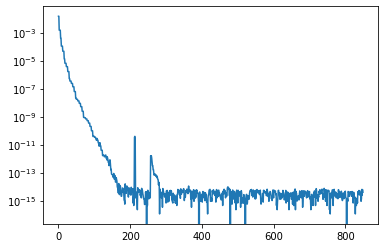

In [56]:
plt.semilogy(range(len(evals1)),list_)

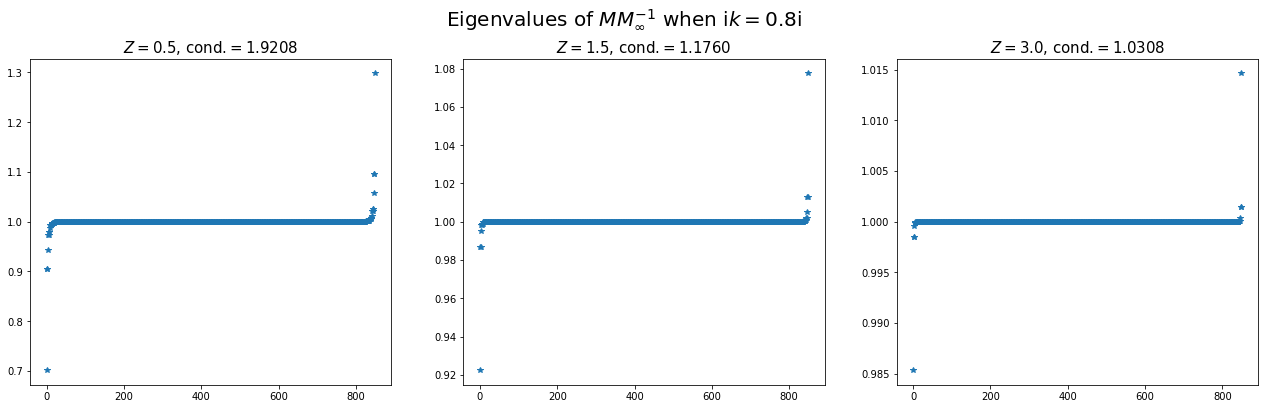

In [7]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.plot(range(len(evals1)), sorted(np.real(evals1)), '*')
ax1.set_title('$Z = 0.5$, cond.$ = 1.9208$', fontsize = 15)

ax2.plot(range(len(evals2)), sorted(np.real(evals2)), '*')
ax2.set_title('$Z = 1.5$, cond.$ = 1.1760$', fontsize = 15)

ax3.plot(range(len(evals3)), sorted(np.real(evals3)), '*')
ax3.set_title('$Z = 3.0$, cond.$ = 1.0308$', fontsize = 15)

fig.suptitle('Eigenvalues of $MM_{\infty}^{-1}$ when $\mathrm{i}k = 0.8\mathrm{i}$', fontsize = 20, y = 1)
fig.savefig('eige & cond 08i scalar.pdf')

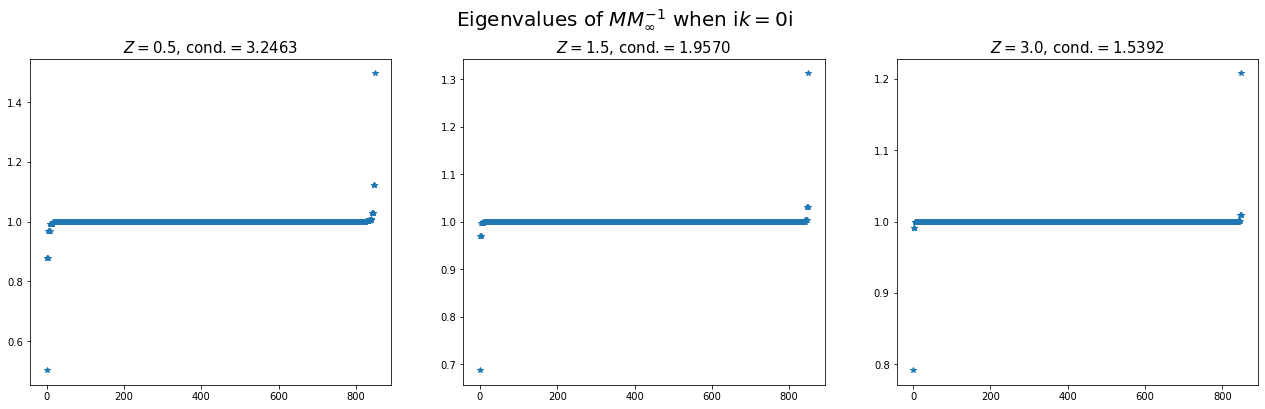

In [11]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.plot(range(len(evals11)), sorted(np.real(evals11)), '*')
ax1.set_title('$Z = 0.5$, cond.$ = 3.2463$', fontsize = 15)

ax2.plot(range(len(evals22)), sorted(np.real(evals22)), '*')
ax2.set_title('$Z = 1.5$, cond.$ = 1.9570$', fontsize = 15)

ax3.plot(range(len(evals33)), sorted(np.real(evals33)), '*')
ax3.set_title('$Z = 3.0$, cond.$ = 1.5392$', fontsize = 15)

fig.suptitle('Eigenvalues of $MM_{\infty}^{-1}$ when $\mathrm{i}k = 0\mathrm{i}$', fontsize = 20, y = 1)
fig.savefig('eige & cond 0i scalar.pdf')

In [8]:
sphere1 = bempp.api.shapes.sphere(h=h, origin=((point1/2) + 1, 0, 0))
sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((point1/2) + 1), 0, 0))

space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
wavenumber = 0

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)

mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
combined = np.linalg.inv(mat2).dot(mat)

sign, logdet = slogdet(combined)
evals11, evec11 = np.linalg.eig(combined)
print(np.linalg.cond(combined))

3.2463196254368376


In [9]:
sphere1 = bempp.api.shapes.sphere(h=h, origin=((point2/2) + 1, 0, 0))
sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((point2/2) + 1), 0, 0))

space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
wavenumber = 0

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)

mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
combined = np.linalg.inv(mat2).dot(mat)

sign, logdet = slogdet(combined)
evals22, evec22 = np.linalg.eig(combined)
print(np.linalg.cond(combined))

1.9570119636711572


In [10]:
sphere1 = bempp.api.shapes.sphere(h=h, origin=((point3/2) + 1, 0, 0))
sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((point3/2) + 1), 0, 0))

space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
wavenumber = 0

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)

mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
combined = np.linalg.inv(mat2).dot(mat)

sign, logdet = slogdet(combined)
evals33, evec33 = np.linalg.eig(combined)
print(np.linalg.cond(combined))

1.5392108253631434


Text(0.5, 1, 'Eigenvalues of $MM_{\\infty}^{-1}$ when $\\mathrm{i}k = 0\\mathrm{i}$')

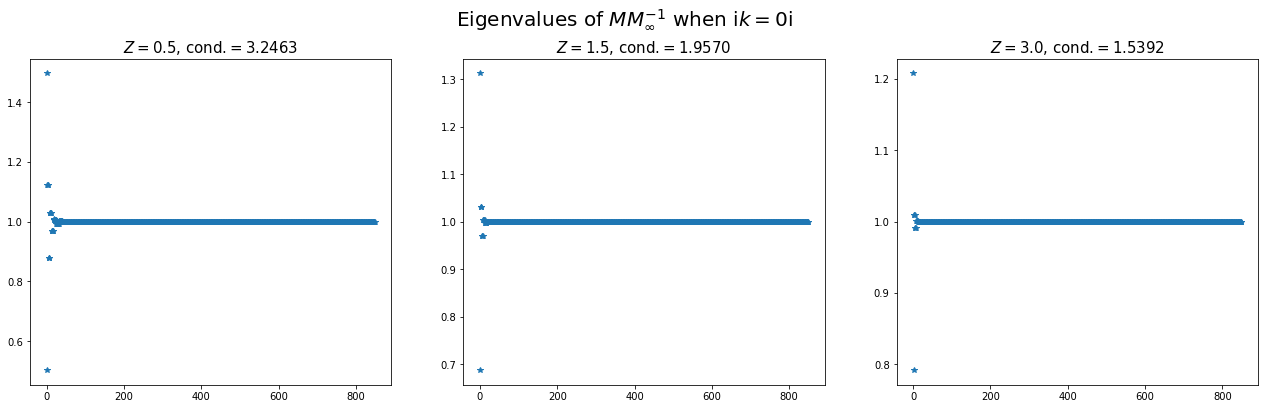

In [37]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.plot(range(len(evals11)), np.real(evals11), '*')
ax1.set_title('$Z = 0.5$, cond.$ = 3.2463$', fontsize = 15)

ax2.plot(range(len(evals22)), np.real(evals22), '*')
ax2.set_title('$Z = 1.5$, cond.$ = 1.9570$', fontsize = 15)

ax3.plot(range(len(evals33)), np.real(evals33), '*')
ax3.set_title('$Z = 3.0$, cond.$ = 1.5392$', fontsize = 15)

fig.suptitle('Eigenvalues of $MM_{\infty}^{-1}$ when $\mathrm{i}k = 0\mathrm{i}$', fontsize = 20, y = 1)

In [9]:
h_02_0 = [0.3330486059831188,  0.1053424453117905, 0.04433803454547886]
h_015_0 = [0.3363415241066274,  0.10593798498048394, 0.044546747534024655]
h_01_0 = [0.3383457153776368, 0.10628976725700122, 0.0446705547257792]
h_005_0 = [0.33979753360247833, 0.10653781175251052, 0.04475800284229498]
h_003_0 = [0.34010717569991256, 0.10659106285876954, 0.044776710471759074]

h_02_08 = [0.11725914620404754,  0.006393200478150703, 0.0002189268309362079]
h_015_08 = [0.11927966630605061,  0.006474927520039633, 0.00022144978618337028]
h_01_08 = [0.1205179135982149, 0.006522879669078689, 0.00022291425013803033]
h_005_08 = [0.12142556305602223, 0.0065570465774269825, 0.0002239734440621791]
h_003_08 = [0.12161953198705748 ,0.006564429242175576, 0.00022420074104158395]

Alex_0 = [0.338863, 0.106619, 0.0447867]
Alex_08 = [0.120394, 0.00656816, 0.000224324]

In [11]:
h_axis = [0.03, 0.05, 0.1, 0.15, 0.2]

In [28]:
alpha_02_0 = []
for i in range(len(h_005_0)):
    alpha_02_0.append(abs(h_005_0[i] - h_02_0[i]))
    
alpha_015_0 = []
for i in range(len(h_005_0)):
    alpha_015_0.append(abs(h_005_0[i] - h_015_0[i]))
    
alpha_01_0 = []
for i in range(len(h_005_0)):
    alpha_01_0.append(abs(h_005_0[i] - h_01_0[i]))

#=====================================================
    
alpha_02_08 = []
for i in range(len(h_005_08)):
    alpha_02_08.append(abs(h_005_08[i] - h_02_08[i]))
    
alpha_015_08 = []
for i in range(len(h_005_08)):
    alpha_015_08.append(abs(h_005_08[i] - h_015_08[i]))
    
alpha_01_08 = []
for i in range(len(h_005_08)):
    alpha_01_08.append(abs(h_005_08[i] - h_01_08[i]))

Text(0.5, 1, 'Convergence rate of the integrand when $\\mathrm{i}k = 0\\mathrm{i}$ (scalar case)')

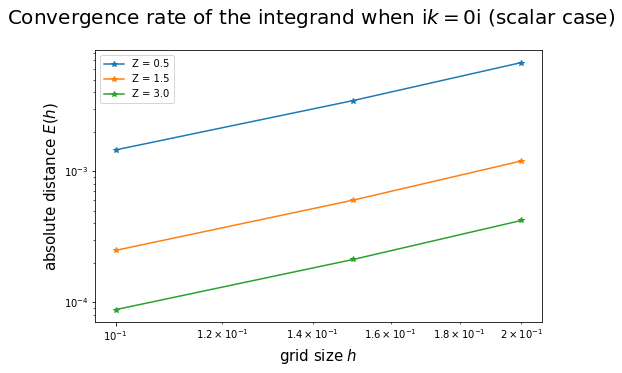

In [58]:
x_axis = [0.1, 0.15, 0.2]
plt.figure(figsize = [8,5])
plt.loglog(x_axis, [alpha_01_0[0], alpha_015_0[0], alpha_02_0[0]], '*-')
plt.loglog(x_axis, [alpha_01_0[1], alpha_015_0[1], alpha_02_0[1]], '*-')
plt.loglog(x_axis, [alpha_01_0[2],alpha_015_0[2],alpha_02_0[2]], '*-')
plt.legend(['Z = 0.5', 'Z = 1.5', 'Z = 3.0'], fontsize = 10)
plt.xlabel('grid size $h$', fontsize = 15)
plt.ylabel('absolute distance $E(h)$', fontsize = 15)
plt.suptitle('Convergence rate of the integrand when $\mathrm{i}k = 0\mathrm{i}$ (scalar case)', fontsize = 20, y = 1)

Text(0.5, 1, 'Convergence rate of the integrand when $\\mathrm{i}k = 0.8\\mathrm{i}$ (scalar case)')

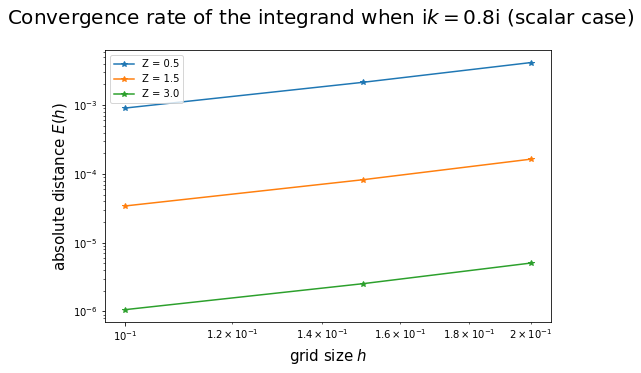

In [59]:
x_axis = [0.1, 0.15, 0.2]
plt.figure(figsize = [8,5])
plt.loglog(x_axis, [alpha_01_08[0], alpha_015_08[0], alpha_02_08[0]], '*-')
plt.loglog(x_axis, [alpha_01_08[1], alpha_015_08[1], alpha_02_08[1]], '*-')
plt.loglog(x_axis, [alpha_01_08[2],alpha_015_08[2],alpha_02_08[2]], '*-')
plt.legend(['Z = 0.5', 'Z = 1.5', 'Z = 3.0'], fontsize = 10)
plt.xlabel('grid size $h$', fontsize = 15)
plt.ylabel('absolute distance $E(h)$', fontsize = 15)
plt.suptitle('Convergence rate of the integrand when $\mathrm{i}k = 0.8\mathrm{i}$ (scalar case)', fontsize = 20, y = 1)

In [61]:
print(np.log(alpha_02_0[0]/alpha_015_0[0])/np.log(0.2/0.15),np.log(alpha_015_0[0]/alpha_01_0[0])/np.log(0.15/0.1))
print(np.log(alpha_02_08[0]/alpha_015_08[0])/np.log(0.2/0.15),np.log(alpha_015_08[0]/alpha_01_08[0])/np.log(0.15/0.1))

2.216797449501454 2.1390197631655714
2.1986000602212608 2.1221420725676134


In [21]:
print(f'when the distance is 2.5 and k = 0: {h_005_0[0] - h_01_0[0], h_01_0[0] - h_015_0[0], h_015_0[0] - h_02_0[0]}')
print(f'when the distance is 3.5 and k = 0: {h_005_0[1] - h_01_0[1], h_01_0[1] - h_015_0[1], h_015_0[1] - h_02_0[1]}')
print(f'when the distance is 5 and k = 0: {h_005_0[2] - h_01_0[2], h_01_0[2] - h_015_0[2], h_015_0[2] - h_02_0[2]}')

when the distance is 2.5 and k = 0: (0.001451818224841528, 0.0020041912710094256, 0.0032929181235085703)
when the distance is 3.5 and k = 0: (0.0002480444955093031, 0.0003517822765172762, 0.00059553966869344)
when the distance is 5 and k = 0: (8.744811651578005e-05, 0.00012380719175454635, 0.00020871298854579362)


In [22]:
print(f'when the distance is 2.5 and k = 0.8: {h_005_08[0] - h_01_08[0], h_01_08[0] - h_015_08[0], h_015_08[0] - h_02_08[0]}')
print(f'when the distance is 3.5 and k = 0.8: {h_005_08[1] - h_01_08[1], h_01_08[1] - h_015_08[1], h_015_08[1] - h_02_08[1]}')
print(f'when the distance is 5 and k = 0.8: {h_005_08[2] - h_01_08[2], h_01_08[2] - h_015_08[2], h_015_08[2] - h_02_08[2]}')

when the distance is 2.5 and k = 0.8: (0.0009076494578073302, 0.0012382472921642906, 0.0020205201020030705)
when the distance is 3.5 and k = 0.8: (3.416690834829369e-05, 4.7952149039055814e-05, 8.172704188893001e-05)
when the distance is 5 and k = 0.8: (1.0591939241487707e-06, 1.4644639546600483e-06, 2.5229552471623773e-06)


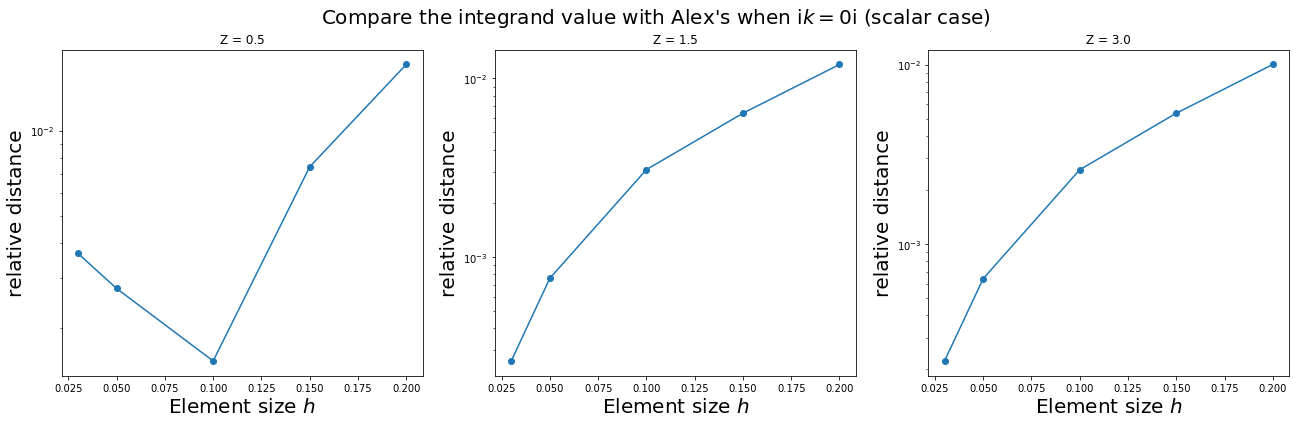

In [12]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.semilogy([0.03,0.05,0.1,0.15,0.2], [abs(h_003_0[0]-Alex_0[0])/Alex_0[0], abs(h_005_0[0]-Alex_0[0])/Alex_0[0], 
                                        abs(h_01_0[0]-Alex_0[0])/Alex_0[0], abs(h_015_0[0]-Alex_0[0])/Alex_0[0],
                                        abs(h_02_0[0]-Alex_0[0])/Alex_0[0]],'o-')
ax1.set_xlabel('Element size $h$', fontsize = 20)
ax1.set_ylabel('relative distance', fontsize = 20)
ax1.title.set_text('Z = 0.5')

ax2.semilogy([0.03,0.05,0.1,0.15,0.2], [abs(h_003_0[1]-Alex_0[1])/Alex_0[1], abs(h_005_0[1]-Alex_0[1])/Alex_0[1], 
                                        abs(h_01_0[1]-Alex_0[1])/Alex_0[1],  abs(h_015_0[1]-Alex_0[1])/Alex_0[1],abs(h_02_0[1]-Alex_0[1])/Alex_0[1]],'o-')
ax2.set_xlabel('Element size $h$', fontsize = 20)
ax2.set_ylabel('relative distance', fontsize = 20)
ax2.title.set_text('Z = 1.5')

ax3.semilogy([0.03,0.05,0.1,0.15,0.2], [abs(h_003_0[2]-Alex_0[2])/Alex_0[2], abs(h_005_0[2]-Alex_0[2])/Alex_0[2], 
                                   abs(h_01_0[2]-Alex_0[2])/Alex_0[2], abs(h_015_0[2]-Alex_0[2])/Alex_0[2],abs(h_02_0[2]-Alex_0[2])/Alex_0[2]],'o-')
ax3.set_xlabel('Element size $h$', fontsize = 20)
ax3.set_ylabel('relative distance', fontsize = 20)
ax3.title.set_text('Z = 3.0')

fig.suptitle('Compare the integrand value with Alex\'s when $\mathrm{i}k = 0\mathrm{i}$ (scalar case)', fontsize = 20)
fig.savefig('h-refine integrand 0 scalar.pdf')

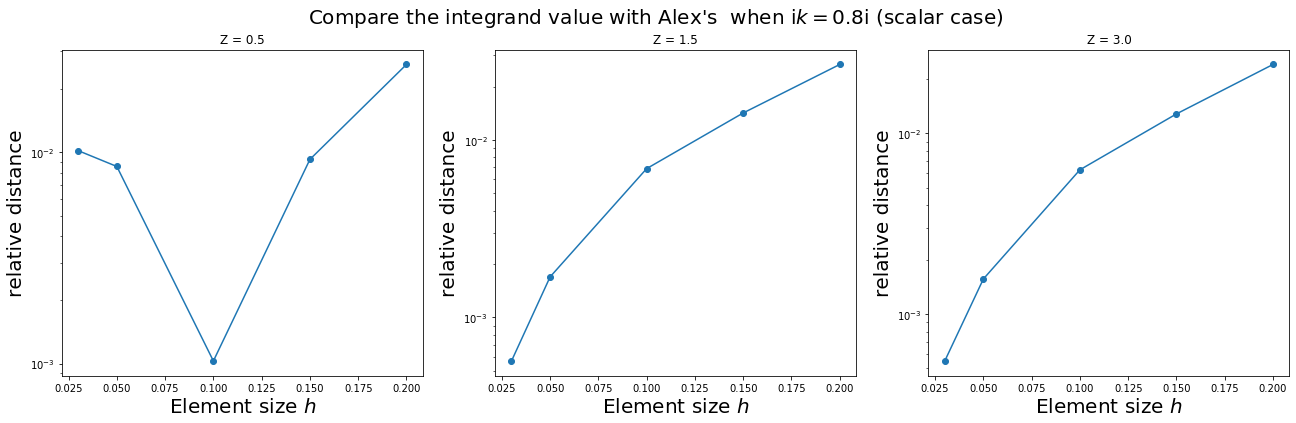

In [13]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.semilogy([0.03,0.05,0.1,0.15,0.2], [abs(h_003_08[0]-Alex_08[0])/Alex_08[0], abs(h_005_08[0]-Alex_08[0])/Alex_08[0], 
                                        abs(h_01_08[0]-Alex_08[0])/Alex_08[0], abs(h_015_08[0]-Alex_08[0])/Alex_08[0],
                                        abs(h_02_08[0]-Alex_08[0])/Alex_08[0]],'o-')
ax1.set_xlabel('Element size $h$', fontsize = 20)
ax1.set_ylabel('relative distance', fontsize = 20)
ax1.title.set_text('Z = 0.5')

ax2.semilogy([0.03,0.05,0.1,0.15,0.2], [abs(h_003_08[1]-Alex_08[1])/Alex_08[1], abs(h_005_08[1]-Alex_08[1])/Alex_08[1], 
                                        abs(h_01_08[1]-Alex_08[1])/Alex_08[1],  abs(h_015_08[1]-Alex_08[1])/Alex_08[1],abs(h_02_08[1]-Alex_08[1])/Alex_08[1]],'o-')
ax2.set_xlabel('Element size $h$', fontsize = 20)
ax2.set_ylabel('relative distance', fontsize = 20)
ax2.title.set_text('Z = 1.5')

ax3.semilogy([0.03,0.05,0.1,0.15,0.2], [abs(h_003_08[2]-Alex_08[2])/Alex_08[2], abs(h_005_08[2]-Alex_08[2])/Alex_08[2], 
                                   abs(h_01_08[2]-Alex_08[2])/Alex_08[2], abs(h_015_08[2]-Alex_08[2])/Alex_08[2],abs(h_02_08[2]-Alex_08[2])/Alex_08[2]],'o-')
ax3.set_xlabel('Element size $h$', fontsize = 20)
ax3.set_ylabel('relative distance', fontsize = 20)
ax3.title.set_text('Z = 3.0')
fig.suptitle('Compare the integrand value with Alex\'s  when $\mathrm{i}k = 0.8\mathrm{i}$ (scalar case)' , fontsize = 20)
fig.savefig('h-refine integrand 0.8 scalar.pdf')

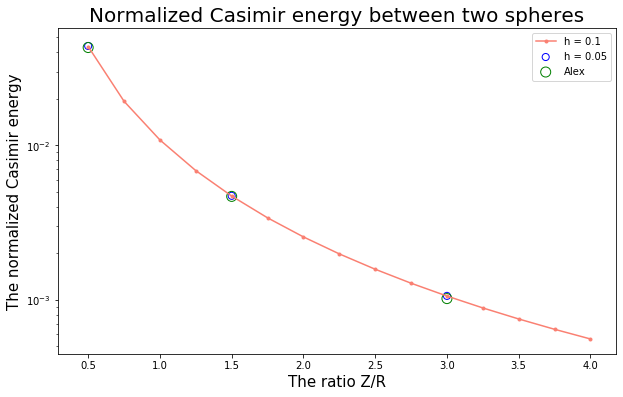

In [23]:
ref_x = [0.5,1.5,3]
ref_y1 = [0.0430362, 0.00467757, 0.00101948]
ref_y2 = [0.0440575, 0.00471758, 0.00106140]
plt.figure(figsize=[10,6])
plt.semilogy(surf_dist, casimir_energy_01, color = 'salmon', linestyle = '-', marker = '.')
#plt.semilogy(surf_dist, casimir_energy_01,'*-')
plt.scatter(ref_x, ref_y2, s=50, facecolors='none', edgecolors='b')
plt.scatter(ref_x, ref_y1, s=100, facecolors='none', edgecolors='g')
plt.legend(['h = 0.1', 'h = 0.05','Alex'])

plt.xlabel('The ratio Z/R', fontsize = 15)
plt.ylabel('The normalized Casimir energy', fontsize = 15)
plt.title('Normalized Casimir energy between two spheres', fontsize = 20)
plt.savefig('Scalar: Compare with Alex.pdf')

In [2]:
h= 0.1

center1 = (2.5, 0, 0)
center2 = (-2.5, 0, 0)

sphere1 = bempp.api.shapes.sphere(h=h, origin=center1)
sphere2 = bempp.api.shapes.sphere(h=h, origin=center2)

space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
space_sphere2 = bempp.api.function_space(sphere2, "P", 1)

In [3]:
N = 10
lbound = 0
ubound = 6
quad_points = np.linspace(np.exp(-ubound), np.exp(-lbound), N)
results = np.empty(N, dtype='float64')

In [4]:
for index, point in enumerate(quad_points):
    
    wavenumber = -1j * np.log(point)
    
    slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
    slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
    slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
    slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)

    mat11 = slp11.weak_form().A
    mat12 = slp12.weak_form().A
    mat21 = slp21.weak_form().A
    mat22 = slp22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.block([[mat11,mat12],[mat21,mat22]])  
    mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])

    p,l,u = scipy.linalg.lu(mat)
    logdet_mat = 0
    for i in range(u.shape[0]):
        logdet_mat += cmath.log(u[i,i])

    p2,l2,u2 = scipy.linalg.lu(mat2)
    logdet_mat2 = 0
    for i in range(u2.shape[0]):
        logdet_mat2 += cmath.log(u2[i,i])

    logdet = logdet_mat - logdet_mat2
    results[index] = np.real(logdet)
    print(logdet)

0j
(-4.6096829464659095e-08+0j)
(-2.9834918677806854e-06+0j)
(-3.561965058906935e-05+0j)
(-0.00021219540576566942+0j)
(-0.0008660577223054133+0j)
(-0.002795955162582686+0j)
(-0.007727293159405235+0j)
(-0.01922487582123722+0j)
(-0.0446705547728925+0j)


In [56]:
casimir_energy = np.trapz(-results / quad_points, quad_points) / (2 * np.pi)
print(f"The normalized Casimir Energy is: {casimir_energy}")

The normalized Casimir Energy is: 0.0010625992946581128


In [29]:
compensation1 = (results[-1] * np.log(quad_points[-1]))/(2*np.pi)
print(compensation1)

3.5416512762736803e-06


In [30]:
casimir_energy + compensation1

0.0010624059907790038

In [6]:
-results

array([-0.00000000e+00,  4.60968295e-08,  2.98349187e-06,  3.56196506e-05,
        2.12195406e-04,  8.66057722e-04,  2.79595516e-03,  7.72729316e-03,
        1.92248758e-02,  4.46705548e-02])

In [ ]:
# h = 0.05 Z = 3 (R = 5):0.0010343333779947149 3.548589563727466e-06 0.0010378819675584423

# h = 0.05 Z = 0.5 (R = 2.5): 0.04409664162678309 2.701858012227347e-05 0.04412366020690536

# h = 0.05 Z = 1.5 (R = 3.5): 0.004686153917552493 8.460688310145012e-06 0.0046946146058626384

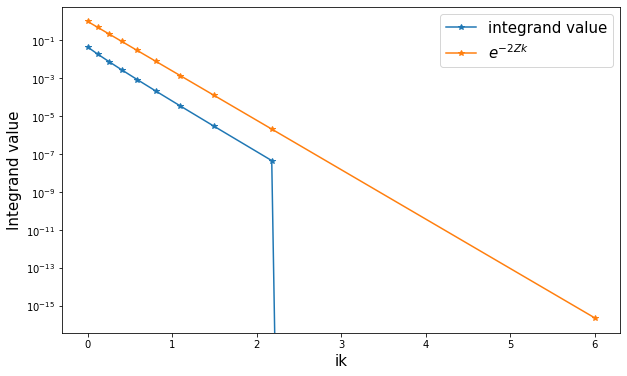

In [5]:
plt.figure(figsize = [10,6])
plt.semilogy(-np.log(quad_points), -results, '*-')
plt.semilogy(-np.log(quad_points), np.exp(2*3*np.log(quad_points)), '*-')
plt.legend(['integrand value','$e^{-2Zk}$'],loc=1, prop={'size': 15})
plt.xlabel('ik', fontsize = 15)
plt.ylabel('Integrand value',fontsize = 15)
plt.savefig('Scalar: integrand value exp decay.pdf')

Text(0, 0.5, 'The value of the integrand')

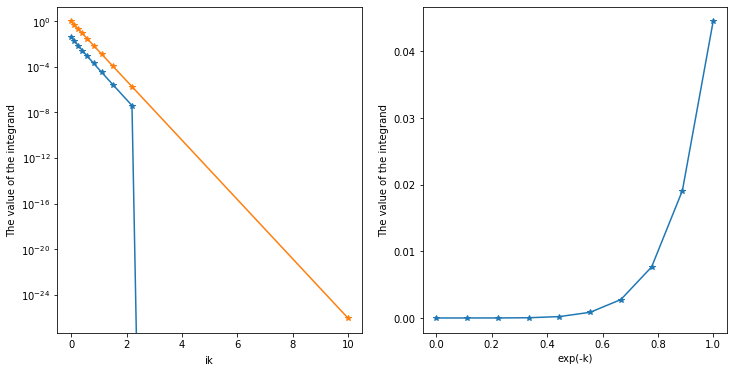

In [31]:
%matplotlib inline
from matplotlib.pyplot import figure

fig = figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('$\mathrm{i}$k')
ax1.set_ylabel('The value of the integrand')
ax2 = fig.add_subplot(122)
ax2.set_xlabel('exp(-k)')
ax1.semilogy(-np.log(quad_points), -results, '*-')
ax1.semilogy(-np.log(quad_points), np.exp(2*3*np.log(quad_points)), '*-')
ax2.plot(quad_points, -results, '*-')
ax2.set_ylabel('The value of the integrand')

In [ ]:
#h = 0.1 N = 10 (0.0005, 10) [0.04368308317546657, 0.01931289432739746, 0.010851995896095739, 0.0068698859786740975, 0.004701714825844722, 0.0033981652935409622,
#0.0025570617159480823, 0.001984851135802275, 0.0015792830659559708, 0.001282273891262514, 0.0010588641972866636, 0.0008870400209768652, 0.0007523580889270969
#0.0006450584086816148, 0.0005583543352397074]

#h = 0.05 N = 10 (0.0005, 10) [0.044057587968300865, 0.019419007732398477, 0.010900542085302476, 0.006896282876562902, 0.004717587477019146, 0.003408658186063775
#0.002564410855406871] not complpete

#h = 0.1 N = 20 (0.0005, 10) [0.04376056425924877, 0.019387112556034446, 0.010823838792645157, 0.006829394000217169, 0.004660187120532493, 0.0033571540883599975,
#0.0025169195982399505, 0.0019457285027467879, 0.001541253361784944, 0.001245364355886085, 0.0010230731910531702, 0.0008523480111274912, 0.0007187353628886178,
#0.0006124693871504389, 0.0005267605416446836]

#h = 0.05 N = 20 (0.0005, 10) [0.04411590724820102] not complete

#h = 0.1 N = 10 (0.0005, 20) [0.04355710341972167, 0.019304342297031235, 0.01085072670292802, 0.006868672372147117, 0.004700342078786005, 0.003397035464110822,
#0.0025556094189687073, 0.0019832340253504955, 0.0015778714560051314, 0.0012809697361217114, 0.0010574918358135267, 0.0008857127456911809, 0.0007510430536794689,
#0.0006435276034209508, 0.0005570871454980026]

#h = 0.05 N = 10 (0.0005, 20) [0.043992218663233, 0.01942247412150311] not complete

#h = 0.1 N = 20 (0.0005, 20) [0.04370172949888851, 0.019383111684513916, 0.010823236305849384, 0.006828817030836222, 0.004659535458380699, 0.003356617690931574,
#0.0025162305065443607, 0.001944961373867202, 0.0015405836080548802, 0.0012447455359834128, 0.0010224220973853717, 0.000851718308170755, 0.0007181114911078158
#0.0006117433408523157, 0.0005261593970734914]